In this notebook, im going to show how to make pie graphics. <br/>
I will use a dataset from Kaggle: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

%matplotlib inline

Load & process the data

In [143]:
data = pd.read_csv('data/Mall_Customers.csv')
data.rename(columns={'CustomerID':'id', 'Gender':'sex', 'Annual Income (k$)':'income',
                    'Spending Score (1-100)': 'score', 'Age': 'age'}, inplace=True)
data.set_index('id', inplace=True)

young = data['age'] < 35
mid_aged = (data['age'] >= 35) & (data['age'] < 55)
old = data['age'] >= 55

ages_cat = young * 1 + mid_aged * 2 + old * 3
data['age'] = ages_cat
data['age'] = data['age'].map({1:'young', 2:'mid-aged', 3:'old'})

data.head()

,sex,age,income,score
id,,,,
1,Male,young,15,39
2,Male,young,15,81
3,Female,young,16,6
4,Female,young,16,77
5,Female,young,17,40


Visualize customer sex proportions

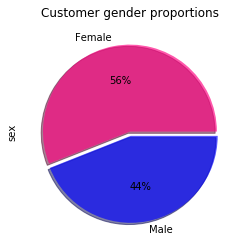

In [105]:
data['sex'].value_counts().plot.pie(
    explode=[0, 0.05], shadow=True, colors=[(1, 0, 0.5, 0.65), (0, 0, 1, 0.65)],
    autopct='%1.0f%%')
plt.title('Customer gender proportions');

Group customers by score

Text(0.5, 1.0, 'Customer scores')

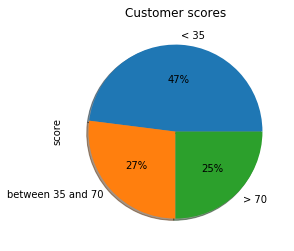

In [94]:
((data['score'] // 35).value_counts()).plot.pie(
    shadow=True, autopct='%d%%', labels=['< 35', 'between 35 and 70', '> 70'])
plt.title('Customer scores')